# Esercitazione 1

In questa sezione ci sono i principali esercizi fatti nella prima esercitazione di laboratorio.

In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
%matplotlib inline

In [3]:
dataset = torch.tensor([[1,3],
                        [1.11, 3.06],
                        [1.2, 3.3],
                        [1.3, 3.4],
                        [1.43, 3.7],
                        [1.6, 3.5],
                        [1.8, 3.66],
                        [1.87, 3.82],
                        [2.1,4]], dtype = torch.float)
# nel dataset ci sono i punti a 2 coordinate
x = dataset[:,0]     # we select the first feature of all points (variabile indipendente)
y = dataset[:,1]     # we select the second feature of all points (variabile dipendente)

## Gradient Descent

In [4]:
params = torch.zeros(2, requires_grad = True)

def model(x,params):
    a,b = params
    return(a*x+b)

def mse(y,y_predict):
    return ((y-y_predict)**2).mean()

In [5]:
# Creo algoritmo

learning_rate = .01                              
losses = []                                      
As = []                                          
bs = []                                          

for epoch in range(3):                         
    
  if params.grad is not None:
    params.grad.zero_()        # metodo per annullare un tensore                   
                                                  
                                                 

  y_predicted = model(x, params)
  loss = mse(y_predicted, y)
  loss.backward()                                 
                                                  
                                                 
                                                 

  As.append(float(params[0]))                     
                                                 
  bs.append(float(params[1]))
  losses.append(float(loss))

  with torch.no_grad():                           
                                                 
      params -= learning_rate * params.grad       

In [6]:
print("a, b, c =", params, "\nLoss: ", losses[-1])

a, b, c = tensor([0.2979, 0.1962], requires_grad=True) 
Loss:  9.378692626953125


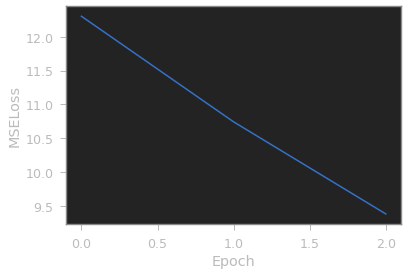

In [7]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSELoss")

plt.show()

In [8]:
y_predicted = model_quad(x, params).detach()    # we detach the values of a and b from their gradient
                                             # con detach lo stacchi dall'albero

plt.scatter(x, y)
plt.plot(x, y_predicted, color = "red")

plt.xlabel("x")
plt.ylabel("y")

plt.show()

NameError: name 'model_quad' is not defined

## Linear regression - diabetes

In [6]:
from sklearn.datasets import load_diabetes # importiamo il dataset
diabetes = load_diabetes()

In [13]:
# we import the diabetes dataset

X = torch.tensor(diabetes.data, dtype = torch.float)   # features
y = torch.tensor(diabetes.target, dtype = torch.float) # label (dopo quanto tempo peggiora la malattia)

number_sample_train = 150
y = y / y.max() # normalizziamo le labels per avere Loss che non esplodano

In [18]:
def calcola_pseudo_inv(X,lambda_reg=0):
    n = X.shape[1]
    pseudo_inv = torch.matmul((torch.inverse(torch.matmul(X.T,X)+lambda_reg*torch.eye(n))),X.T)  
    return(pseudo_inv)

def calcola_w_ML(X,y,lambda_reg=0):
    A = calcola_pseudo_inv(X,lambda_reg)
    w_ML = torch.matmul(A,y)
    return(w_ML)

def predict(X,w):           # regressione lineare, data la design matrix e vettore parametri
    y_predict = torch.matmul(X,w)
    return(y_predict)

# errore con ridge regression

def errore(y,y_predict,w,lambda_reg=0):
    m = len(y)
    diff = y-y_predict
    err = (torch.matmul(diff.T,diff)+lambda_reg*torch.matmul(w.T,w))/m
    return(err)

def r2(y,y_predict):
    RSS = ((y-y_predict)**2).sum()
    TSS = ((y-y.mean())**2).sum()
    r2 = 1- RSS/TSS
    return(r2)

In [1]:
bias = torch.tensor([[1]]*X.size()[0])
Design_Matrix = torch.cat((X,bias),1)
D_train, D_test = Design_Matrix[:number_sample_train], Design_Matrix[number_sample_train:]
y_train, y_test = y[:number_sample_train], y[number_sample_train:]

w_ML = calcola_w_ML(D_train,y_train,lambda_reg=0)
y_predict = predict(D_test,w_ML)
err_T = errore(y_train,torch.matmul(D_train,w_ML),w_ML,lambda_reg=0)
err_g = errore(y_test,y_predict,w_ML,lambda_reg=0)

NameError: name 'torch' is not defined

## Sklearn Linear Regression

In [26]:
diabetes_X_train, diabetes_X_test = X[:number_sample_train], X[number_sample_train:]
diabetes_y_train, diabetes_y_test = y[:number_sample_train], y[number_sample_train:]

regr = linear_model.LinearRegression()
ridge = linear_model.Ridge()

regr.fit(diabetes_X_train, diabetes_y_train)
diabetes_y_pred = regr.predict(diabetes_X_test)

# provo Ridge regression via Sklearn

ridge.set_params(alpha=0)     # alpha è quello che io ho chiamato lambda_reg
ridge.fit(diabetes_X_train, diabetes_y_train);

## Confronto tra i risultati

In [27]:
print("Coefficienti linear model sklearn: \n", regr.coef_)
print('')
print('''Coefficienti mio algoritmo: 
''',w_ML)
print('')
print("Coefficienti Ridge regression: \n", ridge.coef_)
print('')

Coefficienti linear model sklearn: 
 [-0.1946023  -1.0693307   1.2887858   0.9378546   0.2575962  -1.0704414
 -0.7617573   0.35604006  1.6735233   0.259839  ]

Coefficienti mio algoritmo: 
 tensor([-0.1946, -1.0693,  1.2888,  0.9379,  0.2575, -1.0703, -0.7617,  0.3560,
         1.6736,  0.2598,  0.4420])

Coefficienti Ridge regression: 
 [-0.19460189 -1.06932957  1.28878518  0.93785423  0.25759546 -1.07044043
 -0.7617567   0.3560407   1.67352304  0.25983869]

